# New Mean and Variance

Now let's take the formulas from the example below and use them to write a program that takes in two means and variances, and returns a *new*, updated mean and variance for a gaussian. This step is called the parameter or **measurement update** because it is the update that happens when an initial belief (represented by the blue Gaussian, below) is merged with a new piece of information, a measurement with some uncertainty (the orange Gaussian). 

As you've seen in the previous quizzes, the updated Gaussian will be a combination of these two Gaussians with a new mean that is in between both of theirs and a variance that is less than the smallest of the two given variances; this means that after a measurement, our new mean is more certain than that of the initial belief!
<img src='images/mean_var.png' width="50%" height="50%">


Below is our usual Gaussian equation and imports.

In [1]:
# import math functions
from math import *
import matplotlib.pyplot as plt
import numpy as np

# gaussian function
def f(mu, sigma2, x):
    ''' f takes in a mean and squared variance, and an input x
       and returns the gaussian value.'''
    coefficient = 1.0 / sqrt(2.0 * pi *sigma2)
    exponential = exp(-0.5 * (x-mu) ** 2 / sigma2)
    return coefficient * exponential
 

### QUIZ: Write an `update` function that performs the measurement update.

This function should combine the given Gaussian parameters and return new values for the mean and squared variance.

This function does not have to perform any exponential math, it simply has to follow the equations for the measurement update as seen in the image at the top of this notebook. You may assume that the given variances `var1` and `var2` are squared terms.

In [2]:
# the update function
def update(mean1, var1, mean2, var2):
    ''' This function takes in two means and two squared variance terms,
        and returns updated gaussian parameters.'''
    ## TODO: Calculate the new parameters
    new_mean = (var1*mean2+var2*mean1) / (var1+var2) 
    new_var = 1/((1/var1)+(1/var2))
    
    return [new_mean, new_var]

In [3]:
# test your implementation
new_params = update(10, 4, 12, 4)
print(new_params)

[11.0, 2.0]


### Plot a Gaussian

Plot a Gaussian by looping through a range of x values and creating a resulting list of Gaussian values, `g`, as shown below. You're encouraged to see what happens if you change the values of `mu` and `sigma2`.

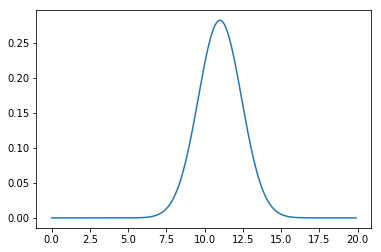

In [4]:
# display a gaussian over a range of x values
# define the parameters
mu = new_params[0]
sigma2 = new_params[1]

# define a range of x values
x_axis = np.arange(0, 20, 0.1)

# create a corresponding list of gaussian values
g = []
for x in x_axis:
    g.append(f(mu, sigma2, x))

# plot the result 
plt.plot(x_axis, g)

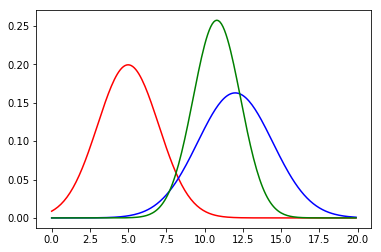

In [6]:
x_axis = np.arange(0, 20, 0.1)

## gaussian 1
mu = 5
sigma2 = 4
g1 = []
for x in x_axis:
    g1.append(f(mu, sigma2, x))

## gaussian 2
mu = 12
sigma2 = 6
g2 = []
for x in x_axis:
    g2.append(f(mu, sigma2, x))

##resultant gaussian
new_params = update(10, 4, 12, 6)
mu = new_params[0]
sigma2 = new_params[1]
g = []
for x in x_axis:
    g.append(f(mu, sigma2, x))

plt.plot(x_axis, g1, color='r')
plt.plot(x_axis, g2, color='b')
plt.plot(x_axis, g, color='g')